### Step 1 : Inspect the columns available

In [23]:
import pandas as pd

# --- CONFIGURATION ---
FILE_PATH = '../data/weekly_housing_market_data_most_recent.tsv000'
CHUNK_SIZE = 100  # number of rows to read per chunk

# Read only the first chunk
chunk_iter = pd.read_csv(FILE_PATH, sep='\t', chunksize=CHUNK_SIZE)

# Get the first chunk
first_chunk = next(chunk_iter)

# Display the column names
print("Columns in dataset:\n", list(first_chunk.columns))


Columns in dataset:
 ['PERIOD_BEGIN', 'PERIOD_END', 'REGION_TYPE', 'REGION_TYPE_ID', 'REGION_NAME', 'REGION_ID', 'DURATION', 'ADJUSTED_AVERAGE_NEW_LISTINGS', 'ADJUSTED_AVERAGE_NEW_LISTINGS_YOY', 'AVERAGE_PENDING_SALES_LISTING_UPDATES', 'AVERAGE_PENDING_SALES_LISTING_UPDATES_YOY', 'OFF_MARKET_IN_TWO_WEEKS', 'OFF_MARKET_IN_TWO_WEEKS_YOY', 'ADJUSTED_AVERAGE_HOMES_SOLD', 'ADJUSTED_AVERAGE_HOMES_SOLD_YOY', 'MEDIAN_NEW_LISTING_PRICE', 'MEDIAN_NEW_LISTING_PRICE_YOY', 'MEDIAN_SALE_PRICE', 'MEDIAN_SALE_PRICE_YOY', 'MEDIAN_DAYS_TO_CLOSE', 'MEDIAN_DAYS_TO_CLOSE_YOY', 'MEDIAN_NEW_LISTING_PPSF', 'MEDIAN_NEW_LISTING_PPSF_YOY', 'ACTIVE_LISTINGS', 'ACTIVE_LISTINGS_YOY', 'MEDIAN_DAYS_ON_MARKET', 'MEDIAN_DAYS_ON_MARKET_YOY', 'PERCENT_ACTIVE_LISTINGS_WITH_PRICE_DROPS', 'PERCENT_ACTIVE_LISTINGS_WITH_PRICE_DROPS_YOY', 'AGE_OF_INVENTORY', 'AGE_OF_INVENTORY_YOY', 'WEEKS_OF_SUPPLY', 'WEEKS_OF_SUPPLY_YOY', 'MEDIAN_PENDING_SQFT', 'MEDIAN_PENDING_SQFT_YOY', 'AVERAGE_SALE_TO_LIST_RATIO', 'AVERAGE_SALE_TO_LIST_RAT

### Step 2 : Lets do some basic data exploration on metro level data

In [33]:
import pandas as pd

FILE_PATH = "../data/weekly_housing_market_data_most_recent.tsv000"
CHUNK_SIZE = 100000  # adjust depending on system memory

filtered_chunks = []

for chunk in pd.read_csv(FILE_PATH, sep='\t', chunksize=CHUNK_SIZE):
    metros = chunk[chunk["REGION_TYPE"].str.lower() == "metro"]
    filtered_chunks.append(metros)

df_metro = pd.concat(filtered_chunks, ignore_index=True)
print(f"Total metro rows: {len(df_metro)}")
print("Columns:", list(df_metro.columns))

Total metro rows: 1252813
Columns: ['PERIOD_BEGIN', 'PERIOD_END', 'REGION_TYPE', 'REGION_TYPE_ID', 'REGION_NAME', 'REGION_ID', 'DURATION', 'ADJUSTED_AVERAGE_NEW_LISTINGS', 'ADJUSTED_AVERAGE_NEW_LISTINGS_YOY', 'AVERAGE_PENDING_SALES_LISTING_UPDATES', 'AVERAGE_PENDING_SALES_LISTING_UPDATES_YOY', 'OFF_MARKET_IN_TWO_WEEKS', 'OFF_MARKET_IN_TWO_WEEKS_YOY', 'ADJUSTED_AVERAGE_HOMES_SOLD', 'ADJUSTED_AVERAGE_HOMES_SOLD_YOY', 'MEDIAN_NEW_LISTING_PRICE', 'MEDIAN_NEW_LISTING_PRICE_YOY', 'MEDIAN_SALE_PRICE', 'MEDIAN_SALE_PRICE_YOY', 'MEDIAN_DAYS_TO_CLOSE', 'MEDIAN_DAYS_TO_CLOSE_YOY', 'MEDIAN_NEW_LISTING_PPSF', 'MEDIAN_NEW_LISTING_PPSF_YOY', 'ACTIVE_LISTINGS', 'ACTIVE_LISTINGS_YOY', 'MEDIAN_DAYS_ON_MARKET', 'MEDIAN_DAYS_ON_MARKET_YOY', 'PERCENT_ACTIVE_LISTINGS_WITH_PRICE_DROPS', 'PERCENT_ACTIVE_LISTINGS_WITH_PRICE_DROPS_YOY', 'AGE_OF_INVENTORY', 'AGE_OF_INVENTORY_YOY', 'WEEKS_OF_SUPPLY', 'WEEKS_OF_SUPPLY_YOY', 'MEDIAN_PENDING_SQFT', 'MEDIAN_PENDING_SQFT_YOY', 'AVERAGE_SALE_TO_LIST_RATIO', 'AVERAGE_SA

In [34]:
df_metro.head()

,PERIOD_BEGIN,PERIOD_END,REGION_TYPE,REGION_TYPE_ID,REGION_NAME,REGION_ID,DURATION,ADJUSTED_AVERAGE_NEW_LISTINGS,ADJUSTED_AVERAGE_NEW_LISTINGS_YOY,AVERAGE_PENDING_SALES_LISTING_UPDATES,...,AGE_OF_INVENTORY_YOY,WEEKS_OF_SUPPLY,WEEKS_OF_SUPPLY_YOY,MEDIAN_PENDING_SQFT,MEDIAN_PENDING_SQFT_YOY,AVERAGE_SALE_TO_LIST_RATIO,AVERAGE_SALE_TO_LIST_RATIO_YOY,MEDIAN_SALE_PPSF,MEDIAN_SALE_PPSF_YOY,LAST_UPDATED
0,2019-09-02,2019-11-24,metro,-2,"Binghamton, NY metro area",13780,12 weeks,50.750,0.099294,46.916,...,1.250000,29.054827,0.196346,1698.458333,0.003916,0.950992,0.001941,68.118416,0.050320,2025-09-24 13:36:20.730
1,2020-09-28,2020-12-20,metro,-2,"Stockton, CA metro area",44700,12 weeks,153.333,0.098508,195.833,...,-21.458333,4.484317,-6.340164,1758.666666,0.061970,1.013599,0.026163,243.378103,0.115137,2025-09-24 13:36:20.730
2,2024-03-18,2024-03-24,metro,-2,"Valdosta, GA metro area",46660,1 weeks,61.000,0.418605,45.000,...,-3.000000,13.562500,-2.604167,1545.000000,-0.020292,0.971585,-0.013963,134.349221,0.221248,2025-09-24 13:36:20.730
3,2018-04-16,2018-04-22,metro,-2,"Sandusky, OH metro area",41780,1 weeks,28.000,0.166667,23.000,...,-3.000000,15.608696,-3.391304,1425.000000,0.006356,0.884588,-0.066577,87.883959,0.202556,2025-09-24 13:36:20.730
4,2017-05-15,2017-05-21,metro,-2,"New Castle, IN metro area",35220,1 weeks,15.000,-0.117647,19.000,...,-17.000000,13.368421,-8.631579,1648.000000,-0.019048,0.957024,0.004049,67.025572,1.246372,2025-09-24 13:36:20.730


In [35]:
df_metro["PERIOD_BEGIN"] = pd.to_datetime(df_metro["PERIOD_BEGIN"])
df_metro["PERIOD_END"] = pd.to_datetime(df_metro["PERIOD_END"])
df_metro = df_metro.sort_values("PERIOD_BEGIN")

In [37]:
df_metro["DURATION"] = df_metro["DURATION"].str.strip().str.lower()

df_metro["DURATION"].unique()

array(['1 weeks', '4 weeks', '12 weeks'], dtype=object)

In [38]:
# Check duplicates across region + period
dups = df_metro.duplicated(subset=["REGION_NAME", "PERIOD_BEGIN","DURATION"])
print("Duplicate rows:", dups.sum())


Duplicate rows: 0


In [39]:
# Identify non-numeric columns that should be numeric
numeric_cols = df_metro.columns.drop(["DURATION","REGION_NAME", "REGION_TYPE", "PERIOD_BEGIN", "PERIOD_END", "LAST_UPDATED"])
df_metro[numeric_cols] = df_metro[numeric_cols].apply(pd.to_numeric, errors="coerce")

# Convert dates
df_metro["PERIOD_BEGIN"] = pd.to_datetime(df_metro["PERIOD_BEGIN"], errors="coerce")
df_metro["PERIOD_END"] = pd.to_datetime(df_metro["PERIOD_END"], errors="coerce")


In [40]:
# Filter to 4-week rolling window
df_metro = df_metro[df_metro["DURATION"] == '4 weeks' ].copy()

# Sort and fill within each metro
df_metro = df_metro.sort_values(["REGION_NAME", "PERIOD_BEGIN"])
df_metro = df_metro.groupby("REGION_NAME").apply(lambda x: x.ffill().bfill()).reset_index(drop=True)

# Drop DURATION (no longer needed)
df_metro = df_metro.drop(columns=["DURATION"], errors="ignore")

# Confirm shape and uniqueness
print(df_metro.groupby("REGION_NAME")["PERIOD_BEGIN"].nunique().head())

C:\Users\megha\AppData\Local\Temp\ipykernel_15528\1135957898.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_metro = df_metro.groupby("REGION_NAME").apply(lambda x: x.ffill().bfill()).reset_index(drop=True)


REGION_NAME
Aberdeen, SD metro area    452
Aberdeen, WA metro area    452
Abilene, TX metro area     452
Ada, OK metro area         452
Adrian, MI metro area      452
Name: PERIOD_BEGIN, dtype: int64


In [41]:
missing = df_metro.isnull().mean().sort_values(ascending=False)
print(missing[missing > 0].head(10))

AVERAGE_SALE_TO_LIST_RATIO_YOY    0.009417
OFF_MARKET_IN_TWO_WEEKS_YOY       0.006182
MEDIAN_PENDING_SQFT               0.005392
OFF_MARKET_IN_TWO_WEEKS           0.005392
MEDIAN_PENDING_SQFT_YOY           0.005392
dtype: float64


In [42]:
df_metro.head()

,PERIOD_BEGIN,PERIOD_END,REGION_TYPE,REGION_TYPE_ID,REGION_NAME,REGION_ID,ADJUSTED_AVERAGE_NEW_LISTINGS,ADJUSTED_AVERAGE_NEW_LISTINGS_YOY,AVERAGE_PENDING_SALES_LISTING_UPDATES,AVERAGE_PENDING_SALES_LISTING_UPDATES_YOY,...,AGE_OF_INVENTORY_YOY,WEEKS_OF_SUPPLY,WEEKS_OF_SUPPLY_YOY,MEDIAN_PENDING_SQFT,MEDIAN_PENDING_SQFT_YOY,AVERAGE_SALE_TO_LIST_RATIO,AVERAGE_SALE_TO_LIST_RATIO_YOY,MEDIAN_SALE_PPSF,MEDIAN_SALE_PPSF_YOY,LAST_UPDATED
0,2017-01-02,2017-01-29,metro,-2,"Aberdeen, SD metro area",10100,4.50,-0.419355,5.50,0.100000,...,-10.750,21.701389,-1.841468,2317.000,0.129624,0.991026,0.040947,82.612505,0.000237,2025-09-24 13:36:20.730
1,2017-01-09,2017-02-05,metro,-2,"Aberdeen, SD metro area",10100,3.25,-0.535714,6.25,0.250000,...,-3.875,17.034722,-7.174802,2400.625,0.160984,0.977997,0.035702,81.958745,0.072890,2025-09-24 13:36:20.730
2,2017-01-16,2017-02-12,metro,-2,"Aberdeen, SD metro area",10100,4.25,-0.370370,4.25,-0.055556,...,4.250,26.020833,-0.045833,2420.125,0.195271,0.978080,0.024140,80.368410,0.087961,2025-09-24 13:36:20.730
3,2017-01-23,2017-02-19,metro,-2,"Aberdeen, SD metro area",10100,5.50,-0.266667,3.75,-0.062500,...,7.500,32.708333,2.191667,2285.500,0.167784,0.964273,-0.007444,76.648096,-0.120064,2025-09-24 13:36:20.730
4,2017-01-30,2017-02-26,metro,-2,"Aberdeen, SD metro area",10100,7.25,0.115385,3.25,-0.187500,...,5.375,35.541667,4.575000,2459.000,0.354914,0.963298,0.022579,76.525164,-0.026367,2025-09-24 13:36:20.730


In [46]:
# Save cleaned and filtered dataset
output_path = "../data/Cleaned4weekRealestateData.csv"
df_metro.to_csv(output_path, index=False)

print(f"✅ File saved successfully as: {output_path}")
print(f"Total rows: {len(df_metro):,}")
print(f"Unique metros: {df_metro['REGION_NAME'].nunique()}")


✅ File saved successfully as: ../data/Cleaned4weekRealestateData.csv
Total rows: 419,128
Unique metros: 928


In [5]:
trend_summary = (
    df_metro.groupby("PERIOD_BEGIN")[["MEDIAN_SALE_PRICE",
                                      "ACTIVE_LISTINGS",
                                      "MEDIAN_DAYS_TO_CLOSE",
                                      "PERCENT_ACTIVE_LISTINGS_WITH_PRICE_DROPS"]]
    .mean()
    .reset_index()
)

print(trend_summary.head())

  PERIOD_BEGIN  MEDIAN_SALE_PRICE  ACTIVE_LISTINGS  MEDIAN_DAYS_TO_CLOSE  \
0   2017-01-02      170779.971866      2549.020555              9.880772   
1   2017-01-09      170002.158933      2572.296470              9.579615   
2   2017-01-16      168755.288708      2590.256752             10.540400   
3   2017-01-23      168185.952438      2612.764854              9.293850   
4   2017-01-30      169194.069432      2639.668347              8.809516   

   PERCENT_ACTIVE_LISTINGS_WITH_PRICE_DROPS  
0                                  0.025169  
1                                  0.026033  
2                                  0.025623  
3                                  0.025892  
4                                  0.027074  


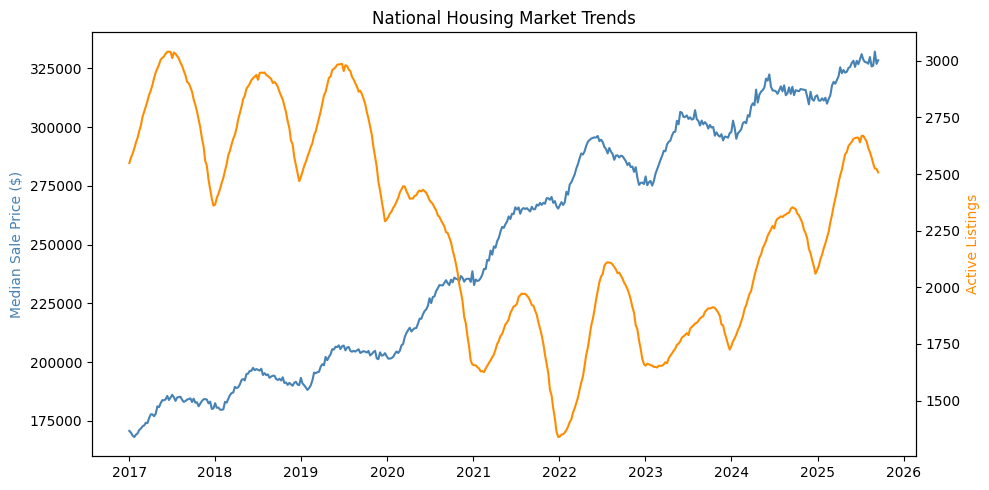

In [6]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10,5))

ax1.plot(trend_summary["PERIOD_BEGIN"], trend_summary["MEDIAN_SALE_PRICE"], label="Median Sale Price", color="steelblue")
ax1.set_ylabel("Median Sale Price ($)", color="steelblue")

ax2 = ax1.twinx()
ax2.plot(trend_summary["PERIOD_BEGIN"], trend_summary["ACTIVE_LISTINGS"], label="Active Listings", color="darkorange")
ax2.set_ylabel("Active Listings", color="darkorange")

plt.title("National Housing Market Trends")
fig.tight_layout()
plt.show()


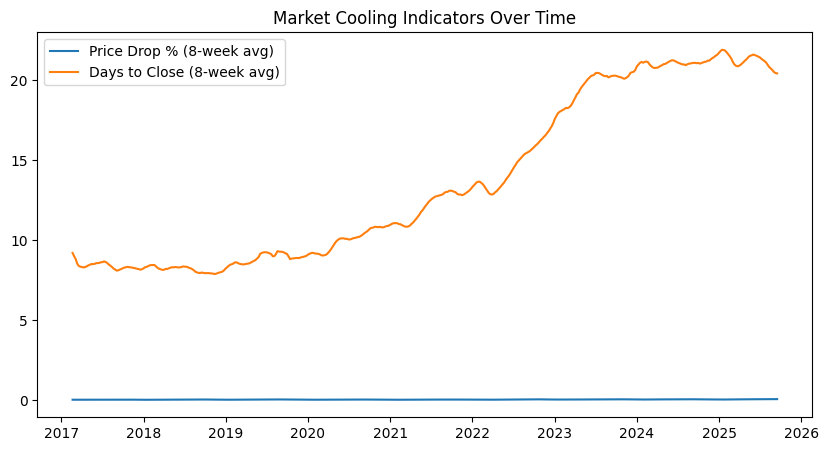

In [7]:
import numpy as np

trend_summary["PRICE_DROP_TREND"] = trend_summary["PERCENT_ACTIVE_LISTINGS_WITH_PRICE_DROPS"].rolling(8).mean()
trend_summary["DAYS_TO_CLOSE_TREND"] = trend_summary["MEDIAN_DAYS_TO_CLOSE"].rolling(8).mean()

plt.figure(figsize=(10,5))
plt.plot(trend_summary["PERIOD_BEGIN"], trend_summary["PRICE_DROP_TREND"], label="Price Drop % (8-week avg)")
plt.plot(trend_summary["PERIOD_BEGIN"], trend_summary["DAYS_TO_CLOSE_TREND"], label="Days to Close (8-week avg)")
plt.legend()
plt.title("Market Cooling Indicators Over Time")
plt.show()


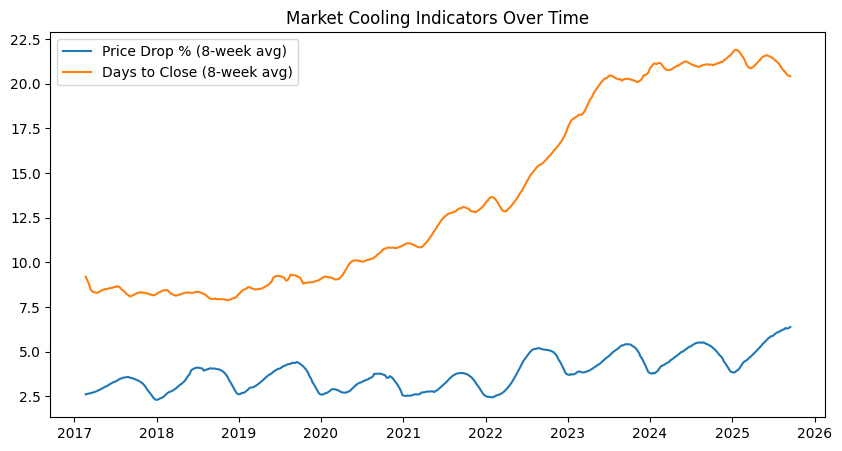

In [11]:
import numpy as np

trend_summary["PRICE_DROP_TREND"] = trend_summary["PERCENT_ACTIVE_LISTINGS_WITH_PRICE_DROPS"].rolling(8).mean() * 100
trend_summary["DAYS_TO_CLOSE_TREND"] = trend_summary["MEDIAN_DAYS_TO_CLOSE"].rolling(8).mean()

plt.figure(figsize=(10,5))
plt.plot(trend_summary["PERIOD_BEGIN"], trend_summary["PRICE_DROP_TREND"], label="Price Drop % (8-week avg)")
plt.plot(trend_summary["PERIOD_BEGIN"], trend_summary["DAYS_TO_CLOSE_TREND"], label="Days to Close (8-week avg)")
plt.legend()
plt.title("Market Cooling Indicators Over Time")
plt.show()

In [8]:
corr = trend_summary[[
    "MEDIAN_SALE_PRICE",
    "ACTIVE_LISTINGS",
    "MEDIAN_DAYS_TO_CLOSE",
    "PERCENT_ACTIVE_LISTINGS_WITH_PRICE_DROPS"
]].corr()

print(corr.round(3))


                                          MEDIAN_SALE_PRICE  ACTIVE_LISTINGS  \
MEDIAN_SALE_PRICE                                     1.000           -0.603   
ACTIVE_LISTINGS                                      -0.603            1.000   
MEDIAN_DAYS_TO_CLOSE                                  0.948           -0.494   
PERCENT_ACTIVE_LISTINGS_WITH_PRICE_DROPS              0.695            0.042   

                                          MEDIAN_DAYS_TO_CLOSE  \
MEDIAN_SALE_PRICE                                        0.948   
ACTIVE_LISTINGS                                         -0.494   
MEDIAN_DAYS_TO_CLOSE                                     1.000   
PERCENT_ACTIVE_LISTINGS_WITH_PRICE_DROPS                 0.709   

                                          PERCENT_ACTIVE_LISTINGS_WITH_PRICE_DROPS  
MEDIAN_SALE_PRICE                                                            0.695  
ACTIVE_LISTINGS                                                              0.042  
MEDIAN_DAYS_T

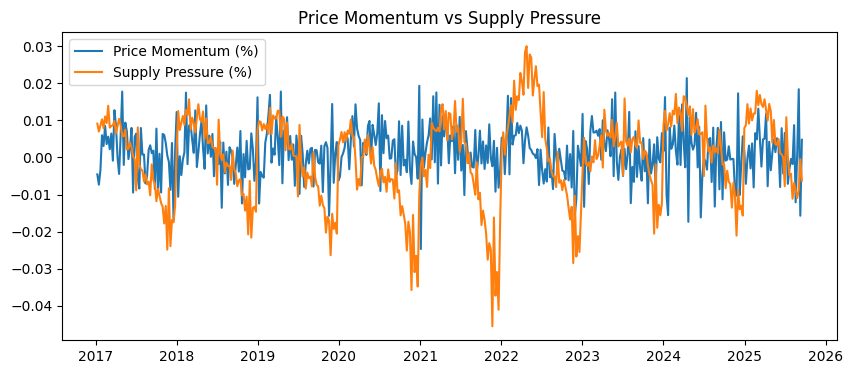

In [9]:
trend_summary["Supply_Pressure"] = trend_summary["ACTIVE_LISTINGS"].pct_change()
trend_summary["Price_Momentum"] = trend_summary["MEDIAN_SALE_PRICE"].pct_change()

plt.figure(figsize=(10,4))
plt.plot(trend_summary["PERIOD_BEGIN"], trend_summary["Price_Momentum"], label="Price Momentum (%)")
plt.plot(trend_summary["PERIOD_BEGIN"], trend_summary["Supply_Pressure"], label="Supply Pressure (%)")
plt.legend()
plt.title("Price Momentum vs Supply Pressure")
plt.show()


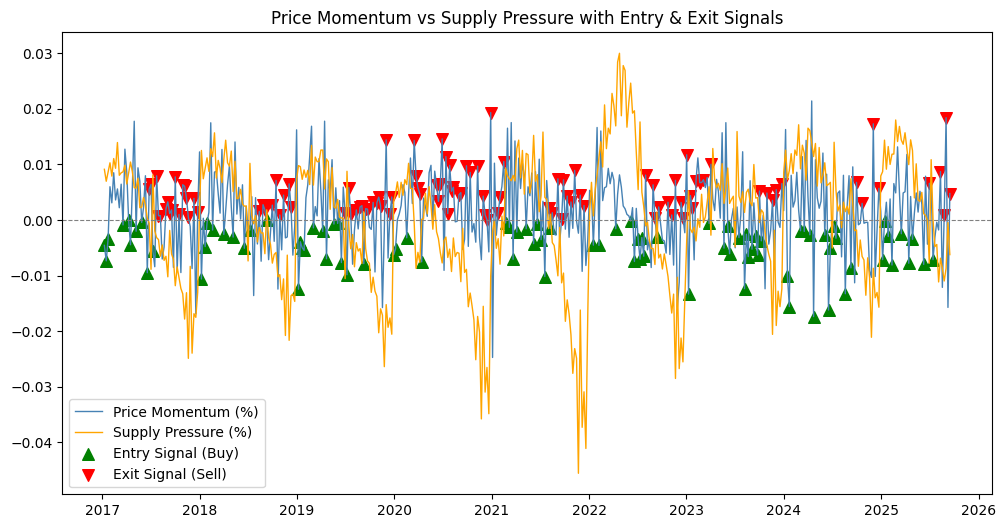

In [12]:
# Define entry and exit conditions directly on trend_summary
trend_summary["Entry_Signal"] = (trend_summary["Price_Momentum"] < 0) & (trend_summary["Supply_Pressure"] > 0)
trend_summary["Exit_Signal"]  = (trend_summary["Price_Momentum"] > 0) & (trend_summary["Supply_Pressure"] < 0)

# Plot with markers
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(trend_summary["PERIOD_BEGIN"], trend_summary["Price_Momentum"], label="Price Momentum (%)", color="steelblue", linewidth=1)
plt.plot(trend_summary["PERIOD_BEGIN"], trend_summary["Supply_Pressure"], label="Supply Pressure (%)", color="orange", linewidth=1)

# Entry (buy) markers
plt.scatter(
    trend_summary.loc[trend_summary["Entry_Signal"], "PERIOD_BEGIN"],
    trend_summary.loc[trend_summary["Entry_Signal"], "Price_Momentum"],
    color="green", marker="^", s=70, label="Entry Signal (Buy)"
)

# Exit (sell) markers
plt.scatter(
    trend_summary.loc[trend_summary["Exit_Signal"], "PERIOD_BEGIN"],
    trend_summary.loc[trend_summary["Exit_Signal"], "Price_Momentum"],
    color="red", marker="v", s=70, label="Exit Signal (Sell)"
)

plt.axhline(0, color="gray", linestyle="--", linewidth=0.8)
plt.title("Price Momentum vs Supply Pressure with Entry & Exit Signals")
plt.legend()
plt.show()


In [13]:
recent = trend_summary.tail(12)
historical = trend_summary.head(12)

print("Recent Year Averages:")
print(recent.mean(numeric_only=True)[["MEDIAN_SALE_PRICE", "ACTIVE_LISTINGS", "PERCENT_ACTIVE_LISTINGS_WITH_PRICE_DROPS"]])

print("\nEarly Period Averages:")
print(historical.mean(numeric_only=True)[["MEDIAN_SALE_PRICE", "ACTIVE_LISTINGS", "PERCENT_ACTIVE_LISTINGS_WITH_PRICE_DROPS"]])


Recent Year Averages:
MEDIAN_SALE_PRICE                           328354.181970
ACTIVE_LISTINGS                               2597.210608
PERCENT_ACTIVE_LISTINGS_WITH_PRICE_DROPS         0.063147
dtype: float64

Early Period Averages:
MEDIAN_SALE_PRICE                           171149.411200
ACTIVE_LISTINGS                               2681.583584
PERCENT_ACTIVE_LISTINGS_WITH_PRICE_DROPS         0.026601
dtype: float64


In [16]:
# Combine both signals into one summary table
signals = trend_summary.loc[trend_summary["Entry_Signal"] | trend_summary["Exit_Signal"], [
    "PERIOD_BEGIN", 
    "Price_Momentum", 
    "Supply_Pressure", 
    "Entry_Signal", 
    "Exit_Signal"
]]

# Add a readable signal label
signals["Signal_Type"] = signals.apply(
    lambda x: "BUY (Entry)" if x["Entry_Signal"] else "SELL (Exit)", axis=1
)

# Round for readability
signals = signals.round({
    "Price_Momentum": 4,
    "Supply_Pressure": 4
})

# Sort by date
signals = signals.sort_values("PERIOD_BEGIN").reset_index(drop=True)

print(signals.head(10))


  PERIOD_BEGIN  Price_Momentum  Supply_Pressure  Entry_Signal  Exit_Signal  \
0   2017-01-30          0.0060           0.0103          True        False   
1   2017-02-06          0.0031           0.0079          True        False   
2   2017-07-03          0.0064          -0.0089         False         True   
3   2017-07-24          0.0080          -0.0032         False         True   
4   2017-08-07          0.0008          -0.0065         False         True   
5   2017-08-14         -0.0070          -0.0045         False         True   
6   2017-09-11          0.0012          -0.0019         False         True   
7   2017-09-18          0.0018          -0.0061         False         True   
8   2017-10-02          0.0078          -0.0118         False         True   
9   2017-11-06          0.0061          -0.0178         False         True   

   Signal_Type  
0  BUY (Entry)  
1  BUY (Entry)  
2  SELL (Exit)  
3  SELL (Exit)  
4  SELL (Exit)  
5  SELL (Exit)  
6  SELL (Exit)  
7  SE